# Proyek Analisis Data: Air Quality Dataset
- Nama: Vicky Joe
- Email: vickyyjoe12@gmail.com
- Id Dicoding: vickyyjoe12

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan kualitas udara dilihat dari persepektif tiap bulan di daerah Aotizhongxin selama periode 2013-2017


- Jenis Partikel mana yang mengalami perubahan paling banyak selama 2013 - 2017 di daerah Aotizhongxin

## Menyaipkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')

mengambil dataset dari drive

In [ ]:
df.head

<bound method NDFrame.head of           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN  

untuk menunjukan data

### Assessing Data

### Cleaning Data

In [ ]:
df = df.dropna()

untuk menghilangkan data yang null

In [ ]:
df.isnull().values.any()

False

untuk mengecek apahakah ada data yang masi null

In [ ]:
df.loc[df.duplicated() == True]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


untuk mengecek data yang duplicate

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


untuk menujunkan data

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.00000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815,31815.000000,31815
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581,NaN,31815
mean,17899.423857,2014.714914,6.401886,15.578564,11.624800,81.86363,109.120685,17.167205,58.976332,1256.574729,56.240938,13.775611,1011.800385,3.241106,0.068235,NaN,1.720471,NaN
std,10058.429849,1.162536,3.416847,8.794954,6.926874,80.44949,93.718017,22.760801,37.061384,1223.301208,57.834314,11.369035,10.338869,13.667863,0.837489,NaN,1.204240,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.00000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,9415.500000,2014.000000,3.000000,8.000000,6.000000,22.00000,37.000000,3.000000,30.000000,500.000000,8.000000,3.400000,1003.300000,-8.000000,0.000000,NaN,0.900000,NaN
50%,18093.000000,2015.000000,6.000000,15.000000,12.000000,58.00000,86.000000,8.000000,53.000000,800.000000,42.000000,14.800000,1011.200000,4.000000,0.000000,NaN,1.400000,NaN
75%,26590.500000,2016.000000,9.000000,23.000000,18.000000,114.00000,154.000000,21.000000,82.000000,1500.000000,82.000000,23.400000,1020.000000,15.700000,0.000000,NaN,2.200000,NaN


untuk memperlihatkan data statistikal yang ada di dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31815 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       31815 non-null  int64  
 1   year     31815 non-null  int64  
 2   month    31815 non-null  int64  
 3   day      31815 non-null  int64  
 4   hour     31815 non-null  int64  
 5   PM2.5    31815 non-null  float64
 6   PM10     31815 non-null  float64
 7   SO2      31815 non-null  float64
 8   NO2      31815 non-null  float64
 9   CO       31815 non-null  float64
 10  O3       31815 non-null  float64
 11  TEMP     31815 non-null  float64
 12  PRES     31815 non-null  float64
 13  DEWP     31815 non-null  float64
 14  RAIN     31815 non-null  float64
 15  wd       31815 non-null  object 
 16  WSPM     31815 non-null  float64
 17  station  31815 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.6+ MB


melihat type data

In [ ]:
df['Date'] = df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str)

<ipython-input-356-897196dc897d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str)


untuk membuat index tanggal

In [ ]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-3-1
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-3-1
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-3-1
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-3-1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-3-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,2017-2-28
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,2017-2-28
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,2017-2-28
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,2017-2-28


memperlihatkan data Date sudah masuk ke dataframe

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'])

<ipython-input-358-1efe410eb2b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
Date,,,,,,,,,,,,,,,,,,
2013-03-01,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
2017-02-28,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
2017-02-28,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin


merubah date menjadi index agar bisa digunakan di timeseries

In [ ]:
monthly_avg = df.groupby('month')['PM2.5','PM10','SO2','NO2','O3'].mean()


<ipython-input-359-73010c002fab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_avg = df.groupby('month')['PM2.5','PM10','SO2','NO2','O3'].mean()


untuk menghitung rata-rata data

In [ ]:
monthly_avg

,PM2.5,PM10,SO2,NO2,O3
month,,,,,
1,93.503752,114.948177,35.349204,66.659611,26.736283
2,83.207848,102.202020,31.022922,53.458819,44.012821
3,100.613010,152.487026,31.999964,63.858656,47.572606
4,75.201647,127.340904,16.131137,52.899579,65.300699
5,67.494173,114.649417,15.314457,48.019410,89.821506
6,69.755755,85.278580,8.038627,47.964885,95.629341
7,75.219323,85.114951,5.703808,47.868829,97.025035
8,55.060187,71.231049,4.357228,48.507378,85.557640
9,64.511714,87.490382,7.176647,59.286340,51.735217


## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana perbedaan kualitas udara dilihat dari persepektif tiap bulan di daerah Aotizhongxin selama periode 2013-2017

<Figure size 640x480 with 0 Axes>

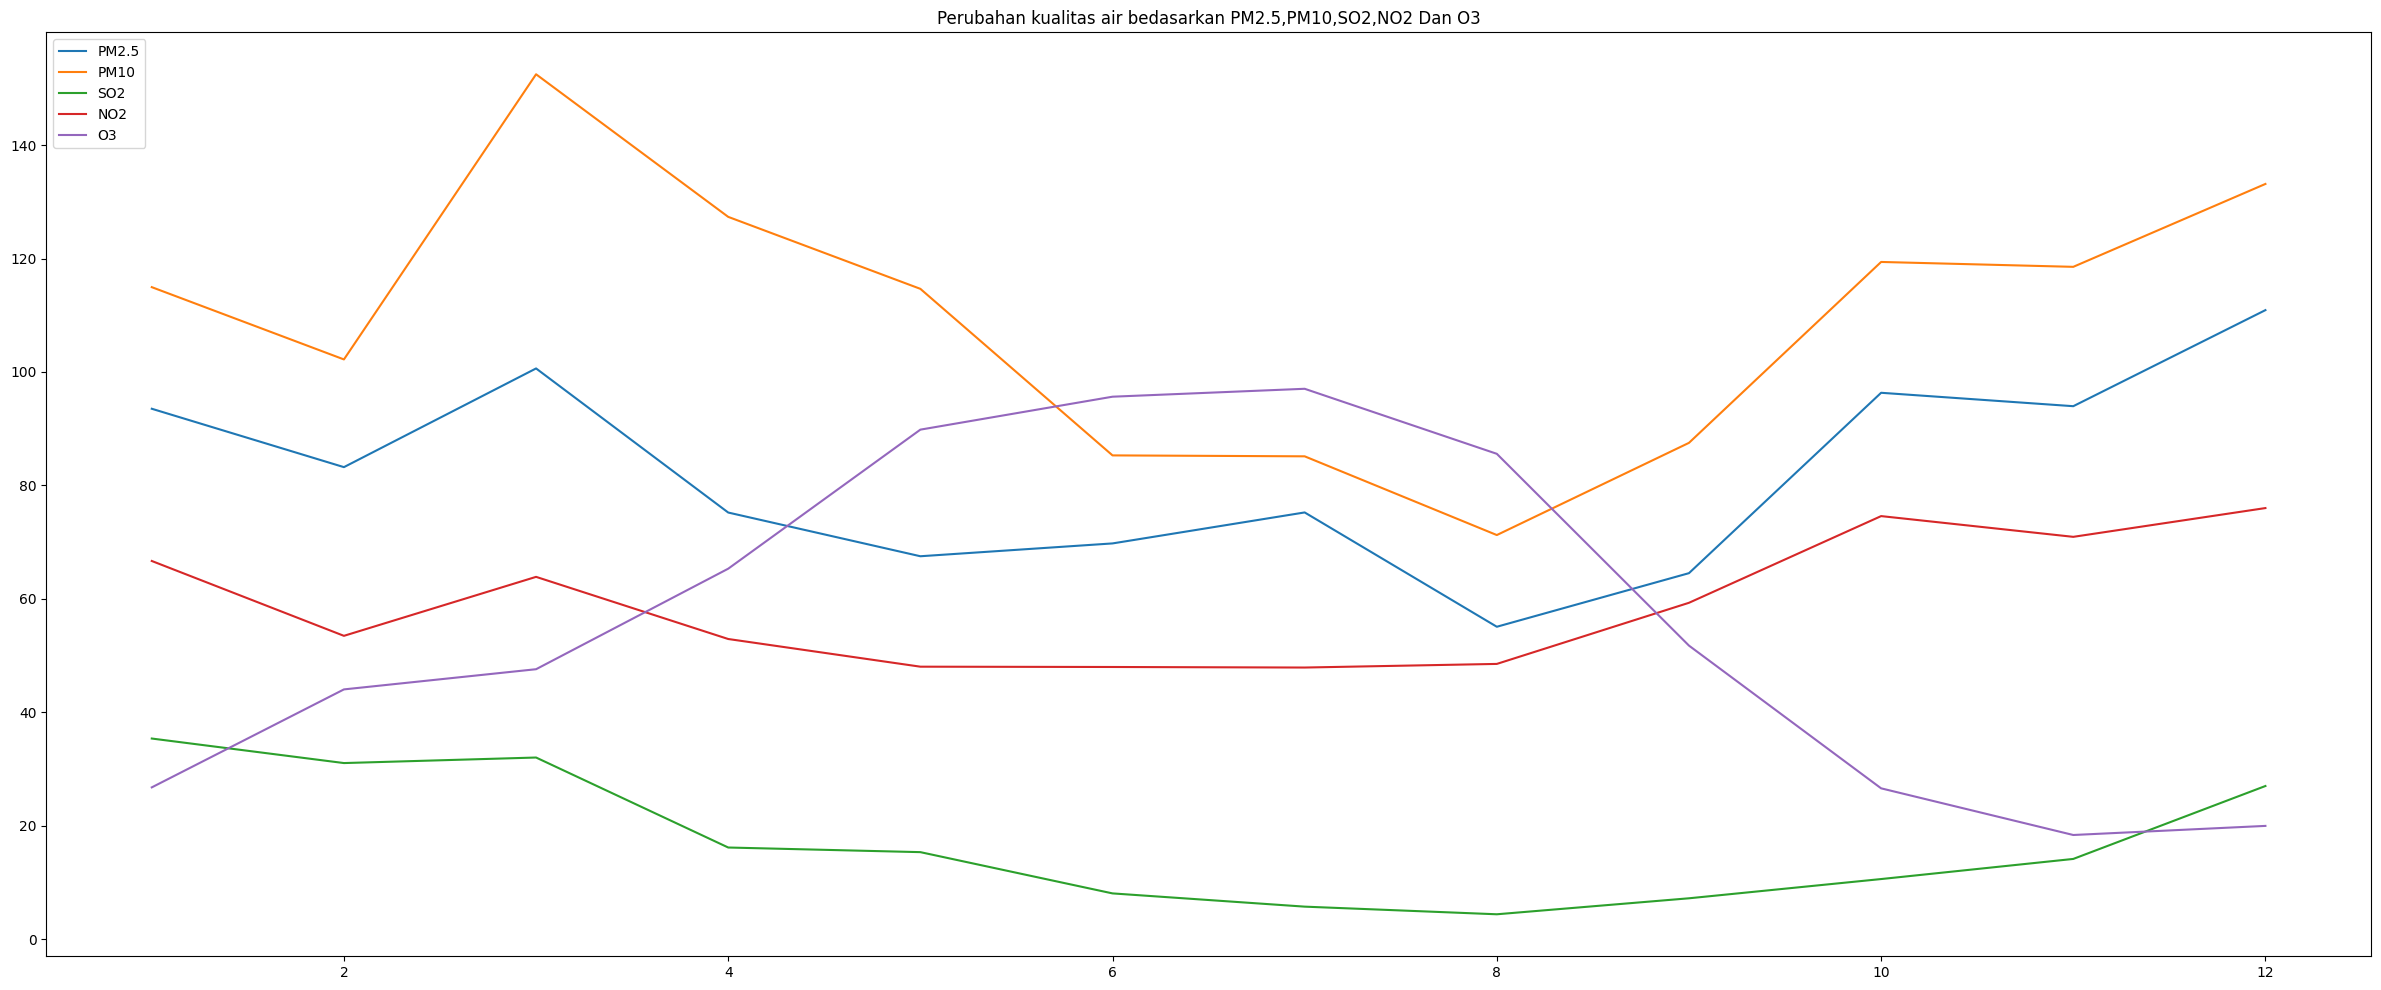

In [ ]:
plt.figure(figsize=(30, 12))
plt.plot(monthly_avg,label=['PM2.5','PM10','SO2','NO2','O3'])
plt.legend(loc="upper left")
plt.title("Perubahan kualitas air bedasarkan PM2.5,PM10,SO2,NO2 Dan O3")
plt.show()

untuk memvisualisasikan perubahan pada bulan awal sampai akhir

Dilihat dari hasil analisis data pada grafik tersebut menunjukan bahwa ketika awal dan diakhir tahun. kualitas udara kurang baik disebabkan beberapa faktor yaitu partikel 2.5, 10, sulfur dioksida dan nitrogen dioksida mengalami peningkatan yang cukup besar. sedangkan dari data o3 (ozon) membuktikan di pertengahan tahun mengalami peningkatan karena kualitas udara membaik

### Pertanyaan 2:

- Jenis Partikel mana yang mengalami perubahan paling banyak selama 2013 - 2017 di daerah Aotizhongxin

In [ ]:
summary = df.describe()

untuk mengambil beberapa statistika data

In [ ]:
features = ['PM2.5','PM10','SO2','NO2','O3']

membuat list feature untuk di visualisasikan

In [ ]:
total_summary = []
for feat in features:
  total_summary.append(summary.loc["max",feat] - summary.loc["min",feat])


melakukan perulangan untuk mengetahui partikel mana yang memiliki perubahan terbanyak

In [ ]:
total_summary

[710.0, 946.0, 228.4288, 288.0, 422.7858]

mengecek total perubahan

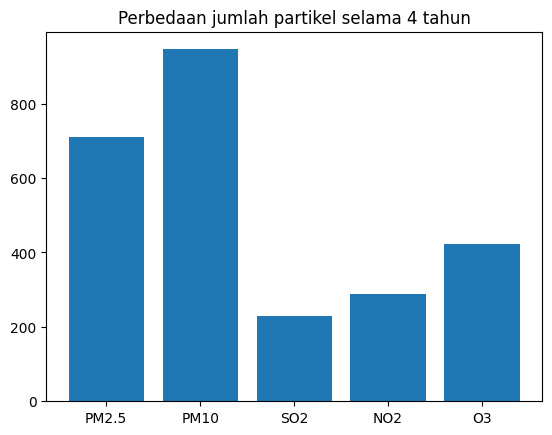

In [ ]:
plt.bar(features, total_summary)
plt.title("Perbedaan jumlah partikel selama 4 tahun")
plt.show()


memvisualisakan perubahan terbanyak

dilihat dari hasil analisis pada grafik diatas partikel yang paling banyak berubah adalah partikel yg berukuran 10 mikrometer

## Conclusion


- Conclution pertanyaan 1
- conclution pertanyaan 2


*   conclusion  1 = air quality di awal dan diakhir bulan kurang baik dibandingkan di pertengahan tahun

*  conclusion  2 = partikel yang paling tidak stabil dan mempengaruhi air quality adalah PM10


